In [1]:
from collections import Counter
from functools import wraps
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # create some randomly ddistributed data:
data = np.random.randn(10000)
  # sort the data:
data_sorted = np.sort(data)
 

p= np.linspace(0, 1, len(data), endpoint=False)

def f(x): return np.interp(x, p, data_sorted)


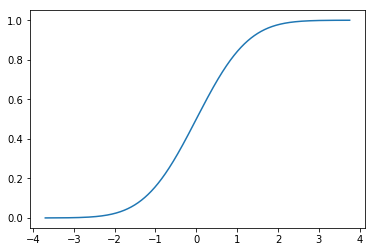

In [2]:
##for unbiased estimator of cdf
#OR WE CAN DO THE SAME USING SCIPY
import numpy as np
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns
x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete
    # plot the cdf
sns.lineplot(x=x, y=norm_cdf) 
plt.show()


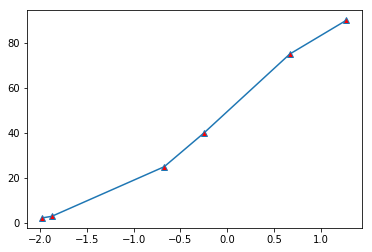

In [3]:
# comparing cdf vs percentile
percent=np.array([2.3,3,25,40,75,90])
data_per= np.percentile(x,percent)
plt.plot(data_per,percent,marker='^',markerfacecolor="red")
plt.show()

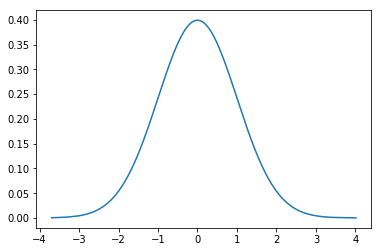

In [4]:
from scipy.stats import norm
x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
norm_pdf = norm.pdf(x) # calculate the cdf - also discrete
    # plot the pdf
sns.lineplot(x=x, y=norm_pdf) 
plt.show()

1.0


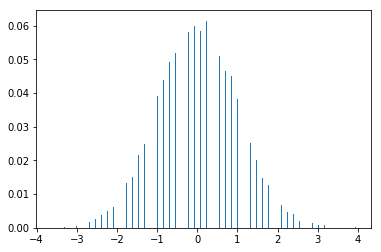

In [5]:
#plot the pmf
num_bins = 50
counts, bins = np.histogram(x, bins=num_bins)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print (probs.sum()) # 1.0
plt.bar(bins, probs, 1.0/num_bins)
plt.show()

In [6]:
# function for PMF

In [7]:
def sorted_dict (fun):
    def wrapper_calling_fun(*args,**kwargs):
        return dict(sorted(fun(*args,**kwargs).items()))
    return wrapper_calling_fun

In [8]:
@sorted_dict
def cnt_num (num):
    c = Counter()
    for i in x:
        i = int((i*1000))//500
        c[i] += 1
    return c
def pmf(num):
    n = len(num)
    s = dict(cnt_num(num))
    for a in s.keys():
        s[a] = s[a]/n
    return s

In [9]:
b = pmf(x)

In [10]:
import pandas as pd
df = pd.DataFrame.from_dict(b,orient='index',columns=['values'])
#df

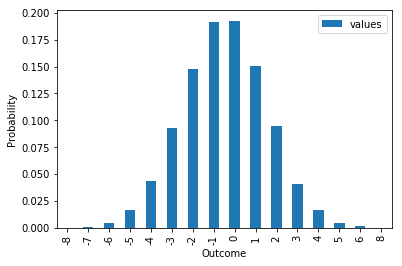

In [11]:
df.plot(kind='bar')
plt.ylabel("Probability")
plt.xlabel("Outcome")
plt.show()
plt.close()

In [12]:
# cdf
# create a function for 4 random numbers

def ran_4(num):
    output=[]
    for i in np.random.randint(0,len(num),4):
        output.append(num[i])
    return output

In [21]:
cdf_list= ran_4(f(x))
cdf_list

[4.097233259388206,
 -1.7682705434755985,
 4.097233259388206,
 -3.6522857525859163]

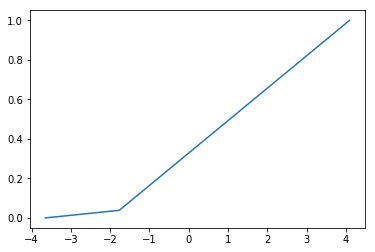

In [22]:
norm_cdf_list=scipy.stats.norm.cdf(cdf_list)
sns.lineplot(x=cdf_list,y=norm_cdf_list)
plt.show()

In [15]:
# partial function

In [16]:
import math
def percentile(N, percent, key=lambda x:x):
    """
    Find the percentile of a list of values.

    @parameter N - is a list of values. Note N MUST BE already sorted.
    @parameter percent - a float value from 0.0 to 1.0.
    @parameter key - optional key function to compute value from each element of N.

    @return - the percentile of the values
    """
    if N is None:
        return None
    k = (len(N)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    if f == c:
        return key(N[int(k)])
    d0 = key(N[int(f)]) * (c-k)
    d1 = key(N[int(c)]) * (k-f)
    return d0+d1


In [17]:
N=[1,2,3,4,5,6,6,]
import functools
#  25th percentile.
perce = functools.partial(percentile, percent=0.25)

In [18]:
perce(N)

2.5